# ADIDAS SALES DATA ANALYSIS

## What business decision do you aim to support with this solution, and how will your findings add value?

This exploratory data analysis investigates Adidas's sales performance over the years 2020 and 2021, examining product-level details, store performance, and overall sales strategies.

The insights derived from this analysis can support numerous business decisions, such as identifying sales trends, pinpointing the most profitable items, and formulating effective future strategies. Additionally, this analysis will help highlight both the top-performing and underperforming products or business areas, enabling targeted improvements that maximize revenue potential.

Evaluating these metrics can streamline internal sales reporting and enhance decision-making across various departments within the company. Regular access to detailed sales analytics positions Adidas to make informed, strategic decisions going forward.

Moreover, this sales analysis provides valuable market insights that could identify future growth opportunities, deepen the understanding of the brand's market positioning, and allow benchmarking against competitors. It can also facilitate assessments of promotional effectiveness and the efficiency of various sales channels.

## Why did you select this data-driven decision-making problem?

The global economy heavily relies on the retail sector, where analyzing consumer purchase histories and tracking detailed data across the buying journey allows retailers to engage customers more personally and effectively. Companies, including Adidas, prioritize maximizing profitability while minimizing costs—a goal intrinsically tied to understanding and effectively reaching target markets.

Business success depends significantly on identifying the appropriate audience and determining the optimal timing, location, and messaging for advertisements and sales initiatives. This dataset is particularly suited for comprehensive analysis because it offers extensive and varied insights into sales patterns, equipping me with the detailed information necessary to generate meaningful insights impactful for brands like Adidas.

## What data will you use, and from where will you source it?

The Adidas sales dataset includes detailed metrics such as quantities sold, total revenue, geographic sales locations, types of products sold, and other relevant variables.

The dataset can be accessed here: https://www.kaggle.com/code/migi03/notebook4aa521867c/input

This project's objective is to leverage historical sales data to inform strategic business decisions. Specifically, the analysis will address the following questions:

- Which months generate the highest sales?

- Are sales higher during weekdays or weekends?

- Which Adidas products sell most frequently and generate the highest profits?

- What correlations exist among different variables within the dataset?

- What is the profit percentage by city?

- What is the market share distribution among various retailers?

- Which retailers perform best in terms of regional sales?

- What is the most effective sales channel?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
%matplotlib inline
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Import Data

In [2]:
df = pd.read_csv('adidas.csv', encoding= 'unicode_escape')

## EDA

In [3]:
df.shape

(9648, 14)

In [4]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,1/1/2020 0:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000.0,0.50,In-store
1,1,Foot Locker,1185732,1/2/2020 0:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000.0,0.30,In-store
2,2,Foot Locker,1185732,1/3/2020 0:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000.0,0.35,In-store
3,3,Foot Locker,1185732,1/4/2020 0:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13387.5,0.35,In-store
4,4,Foot Locker,1185732,1/5/2020 0:00,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200.0,0.30,In-store


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9648 non-null   int64  
 1   Retailer          9648 non-null   object 
 2   Retailer ID       9648 non-null   int64  
 3   Invoice Date      9648 non-null   object 
 4   Region            9648 non-null   object 
 5   State             9648 non-null   object 
 6   City              9648 non-null   object 
 7   Product           9648 non-null   object 
 8   Price per Unit    9648 non-null   float64
 9   Units Sold        9648 non-null   int64  
 10  Total Sales       9648 non-null   int64  
 11  Operating Profit  9648 non-null   float64
 12  Operating Margin  9648 non-null   float64
 13  Sales Method      9648 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.0+ MB


In [6]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020 0:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020 0:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020 0:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020 0:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13387.5,0.35,In-store
4,Foot Locker,1185732,1/5/2020 0:00,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200.0,0.30,In-store


### Check NULL

In [7]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [8]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,12455.083955,4894.793501,0.422991
std,2.636038e+04,14.705397,214.252030,12716.392111,4866.464372,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4065.250000,1753.440000,0.350000
50%,1.185732e+06,45.000000,176.000000,7803.500000,3262.980000,0.410000
75%,1.185732e+06,55.000000,350.000000,15864.500000,6192.360000,0.490000
max,1.197831e+06,110.000000,1275.000000,82500.000000,39000.000000,0.800000


### Dates Corrections

In [9]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 980.0+ KB


In [10]:
df['Invoice_year'] = df['Invoice Date'].dt.year
df['Invoice_month'] = df['Invoice Date'].dt.month_name()
df['Month_num'] = df['Invoice Date'].dt.month
df['Invoice_day'] = df['Invoice Date'].dt.day
df['Invoice_dow'] = df['Invoice Date'].dt.day_name()
df['Date_is_weekend'] = np.where(df['Invoice_dow'].isin(['Saturday','Sunday']),'Weekend','Weekday' )
df['quarter'] = df['Invoice Date'].dt.quarter
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice_year,Invoice_month,Month_num,Invoice_day,Invoice_dow,Date_is_weekend,quarter
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000.0,0.50,In-store,2020,January,1,1,Wednesday,Weekday,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000.0,0.30,In-store,2020,January,1,2,Thursday,Weekday,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000.0,0.35,In-store,2020,January,1,3,Friday,Weekday,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13387.5,0.35,In-store,2020,January,1,4,Saturday,Weekend,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200.0,0.30,In-store,2020,January,1,5,Sunday,Weekend,1


## Sales Analysis

### Monthly Sales

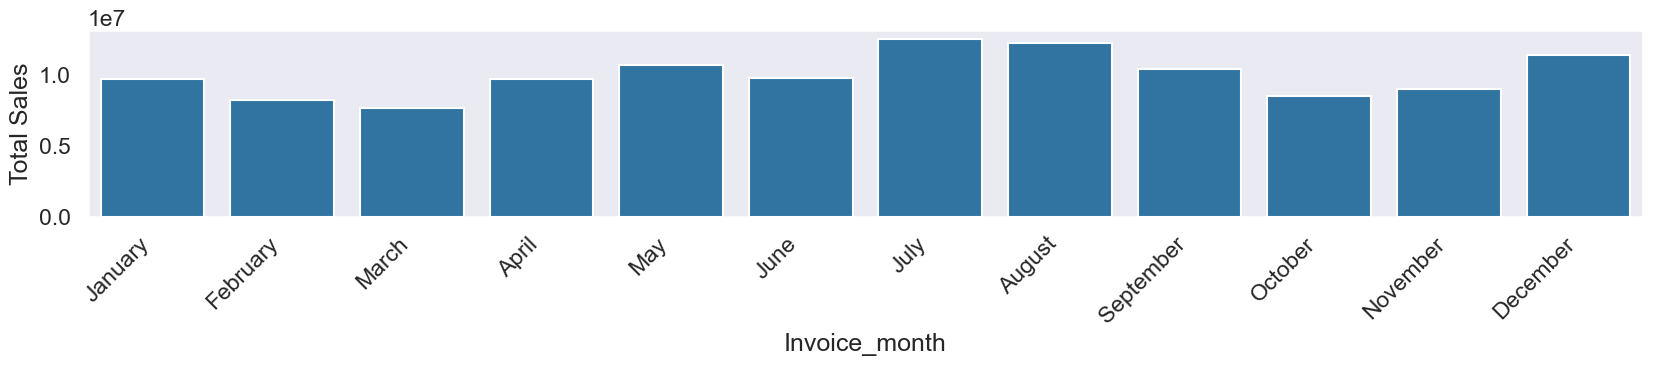

In [11]:
# Group by month number+name, sum sales
df_group = (
    df
    .groupby(['Month_num', 'Invoice_month'], sort=True)['Total Sales']
    .sum()
    .reset_index()
)

# Sort by the numeric month so Jan→Dec
df_group = df_group.sort_values('Month_num')

# Plot
plt.figure(figsize=(17, 4))
sns.set_style('dark')
sns.set_context('talk')

sns.barplot(
    x='Invoice_month',
    y='Total Sales',
    data=df_group,
    dodge=True
    #estimator=np.var
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It is obvious that sales are at their highest in July, August, and December and at their lowest in February, March, and October. There seems to be a general tendency that sales peaked during July 2021 then began to decline as the year progressed. This pattern appears to reflect the overall economy in several ways.
The sales statistics exhibit a definite seasonality tendency. My current theory for this is that the back-to-school and holiday seasons are responsible for these spikes, but further research is required to confirm that.

### Sales by Weekday and Channel

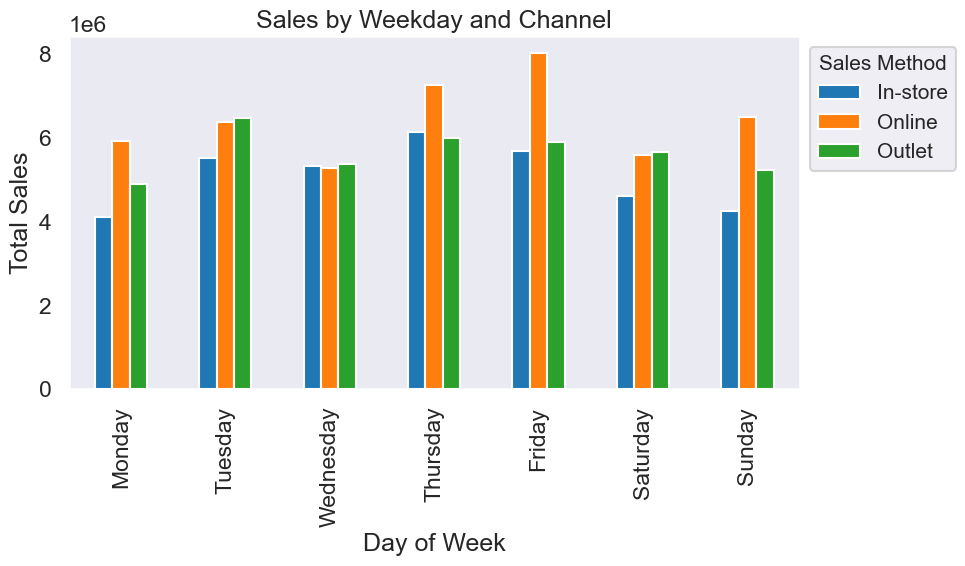

In [12]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sales = df.groupby(['Invoice_dow','Sales Method'])['Total Sales'].sum()
sales_df = sales.unstack(level=1)

# Reindex to force the weekday order
sales_df = sales_df.reindex(weekday_order)

ax = sales_df.plot(
    kind='bar',
    title='Sales by Weekday and Channel',
    figsize=(10, 6),
    legend=False
)

ax.legend(
    title='Sales Method',
    fontsize='small',         # shrink the legend labels
    title_fontsize='small',   # shrink the legend title
    loc='upper left',         # pick a good spot
    bbox_to_anchor=(1, 1)     # put it outside the plot
)

plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Sales through all the three channels (i.e. instore, online, and outlet) are higher during the weekdays.

### Top Selling Products

In [13]:
# Group by products and apply sum function on Total Sales column
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index()

# Index starts from 0 by default so we sum 1
top_selling_products.index+=1

# Show table
top_selling_products

,Product,Total Sales
1,Men's Apparel,16520632
2,Men's Athletic Footwear,20577180
3,Men's Street Footwear,27680769
4,Women's Apparel,23870985
5,Women's Athletic Footwear,14315521
6,Women's Street Footwear,17201563


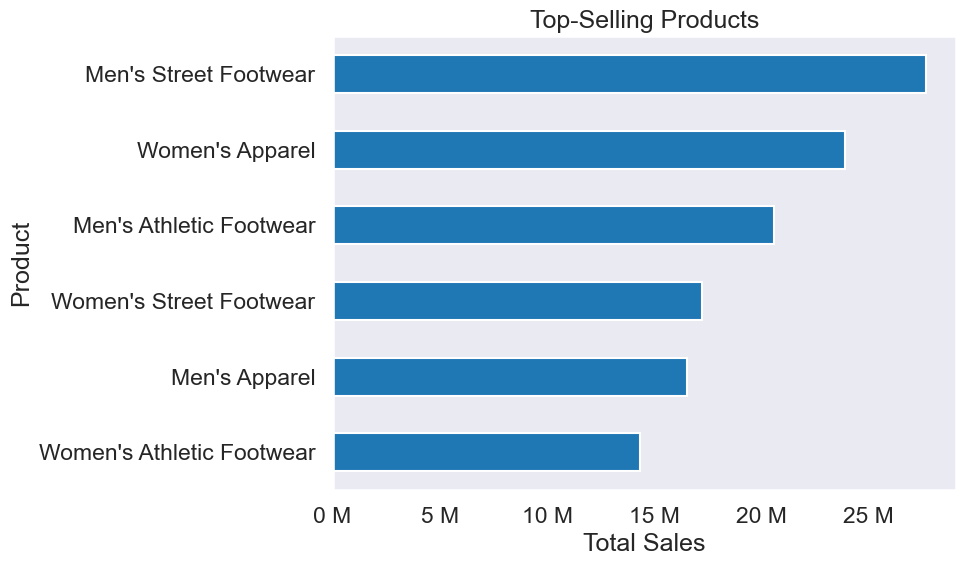

In [14]:
# Sort so the biggest sellers are at the top of the chart:
top_selling_products = top_selling_products.sort_values(
    by='Total Sales', ascending=True
)

# Plot horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))
top_selling_products.plot(
    kind='barh',
    x='Product',
    y='Total Sales',
    legend=False,
    ax=ax,
    title='Top-Selling Products'
)

# Labeling
ax.set_ylabel('Product')
ax.set_xlabel('Total Sales')
ax.ticklabel_format(style='plain', useOffset=False, axis='x')
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f} M')
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5e6))

plt.tight_layout()
plt.show()

According to the analysis, men's street shoes are the most popular item overall, followed by women's clothing and men's athletic shoes. 60% of sales are made up of these 3 categories. The least popular item on the market is athletic footwear for women. This knowledge can assist the business in identifying the best- and worst-selling products and in examining the reasons behind the weak sales of women's athletic footwear.

### Determining Profitable Products

In [15]:
top_profitable_products = df.groupby('Product')['Operating Profit'].sum().reset_index()

top_profitable_products.index+=1

top_profitable_products

,Product,Operating Profit
1,Men's Apparel,6381405.33
2,Men's Athletic Footwear,7437456.94
3,Men's Street Footwear,11629045.62
4,Women's Apparel,9685220.56
5,Women's Athletic Footwear,5597822.44
6,Women's Street Footwear,6494016.81


C:\Users\fabiani.bruno\AppData\Local\Temp\ipykernel_21528\1721558465.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



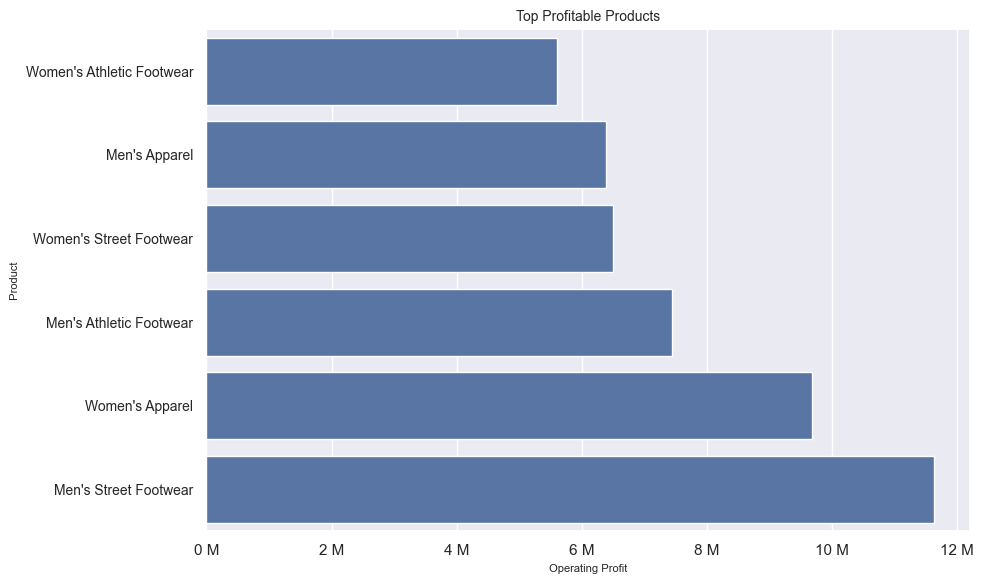

In [23]:
fig , ax = plt.subplots(figsize=(10,6))

sns.set(style='darkgrid')
sns.barplot(data=top_profitable_products, x='Operating Profit', y='Product')

ax.set_yticklabels(ax.get_yticklabels() , fontsize = 10)
ax.set_xlabel(' Operating Profit ', fontsize = 8)
ax.set_ylabel(' Product ', fontsize = 8)
ax.set_title('Top Profitable Products', fontsize = 10)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f} M')
)

plt.tight_layout()
plt.show()

According to the aforementioned data, Men's Street Footwear, subsequent to Women's Apparel then Men's Athletic Footwear, produced the highest profit overall, with Women's Athletic Footwear being the least lucrative. The profit values are also available to us. In order to maximise the company's profit and prepare for the upcoming sales cycle, this might be quite beneficial.

### Citywise Profit

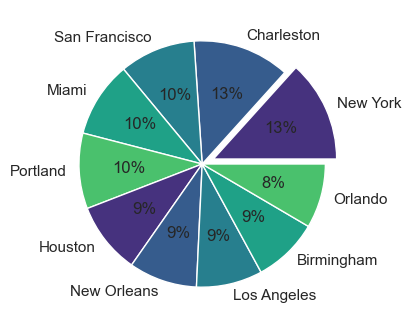

In [24]:
top_grossing = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
#top_grossing

data= list(top_grossing['Operating Profit']) #convert Operating Profit series in a list
labels = list(top_grossing['City']) #convert city series in a list
fig , ax = plt.subplots(figsize=(8,4))

colors = sns.color_palette('viridis')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0,0,0,0,0,0,0,0))
plt.show()

### Retailers' Market Share

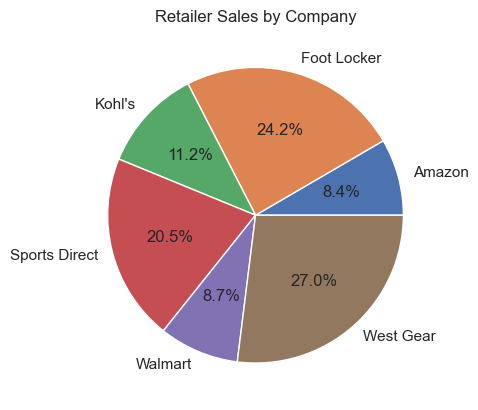

In [27]:
# Group the data by retailer and sum the total sales for each retailer
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()

# Calculate the total sales of all retailers
total_sales = retailer_sales.sum()

# Calculate the market share of each retailer by dividing their total sales by the total sales of all retailers
market_share = retailer_sales / total_sales

plt.title("Retailer Sales by Company")
plt.pie(market_share, labels=retailer_sales.index, autopct='%1.1f%%', shadow=False)
plt.show()

The top two Retailers with highest sales are West Gear and Footlocker, with 27% and 24.2%, respectively. Amazon and Walmart produced the fewest sales.

### Total Sales by Retailer and Region

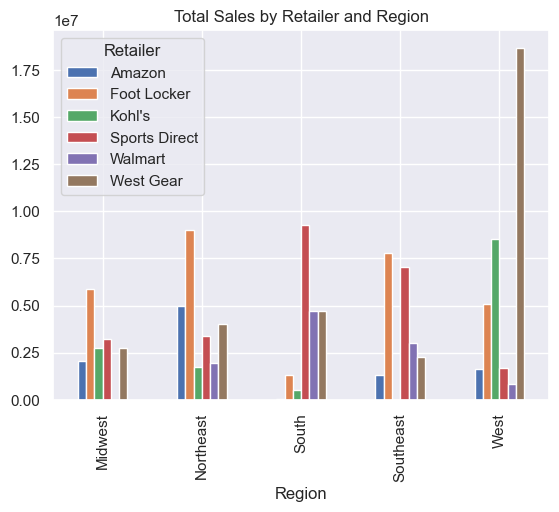

In [28]:
product_sales = df.groupby(['Region','Retailer'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Retailer and Region')
plt.show()


According to the above graph in regards to Total Sales, Sports Direct is the best-performing retailer in the South, FootLocker is the best-performing retailer in the Midwest, Northeast, and Southeast, and West Gear is the best-performing retailer in the West.

### Determining Top Sales Channel

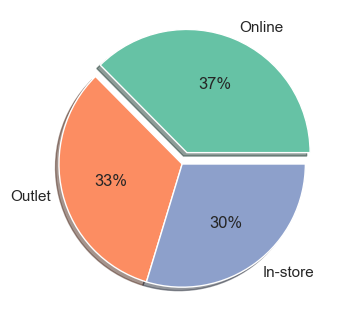

In [29]:
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for pie chart we need 2 lists
data= list(top_methods['Total Sales']) #convert Operating Profit series in a list
labels = list(top_methods['Sales Method'])
fig , ax = plt.subplots(figsize=(8,4))

colors = sns.color_palette('Set2')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0), shadow =True)
plt.show()

According to the data, in-store sales provide the highest revenue, followed by online and outlet sales. This shows that the most effective sales strategy is in-store. Intriguingly, our dataset's lowest sales technique is online sales.It's important to keep in mind that other elements, such as the volume of sales generated by each technique and the accompanying expenditures, can also be influencing the total operating profit. To further understand the performance variations between the different sales strategies, more data analysis could prove beneficial.

### Sales Prediction with Linear Regression Model

In [48]:
df['Region'].value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

In [49]:
df['Retailer'].value_counts(normalize= True)

Retailer
Foot Locker      0.273321
West Gear        0.246061
Sports Direct    0.210614
Kohl's           0.106758
Amazon           0.098362
Walmart          0.064884
Name: proportion, dtype: float64

In [50]:
df['Region'].value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

In [51]:
df['Product'].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

In [52]:
df['Sales Method'].value_counts()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

In [53]:
df['Units Sold'] = df['Units Sold'].astype('int')
df['Total Sales'] = df['Total Sales'].astype('float')
df['Operating Profit'] = df['Operating Profit'].astype('float')
df['Price per Unit'] = df['Price per Unit'].astype('float')
df['Operating Margin'] = df['Operating Margin'].astype('float')

In [54]:
df[['Units Sold','Total Sales','Operating Profit']].corr()

,Units Sold,Total Sales,Operating Profit
Units Sold,1.000000,0.919339,0.871993
Total Sales,0.919339,1.000000,0.935372
Operating Profit,0.871993,0.935372,1.000000


In [55]:
std_scaler = StandardScaler()

In [56]:
df['Total Sales'] = std_scaler.fit_transform(df[['Total Sales']])

Total Sales and Operating Profit has 95% correlation, we will drop one for regression purpose

In [57]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Invoice_year',
       'Invoice_month', 'Month_num', 'Invoice_day', 'Invoice_dow',
       'Date_is_weekend', 'quarter'],
      dtype='object')

In [58]:
X = df[['Retailer','Region','Product','Price per Unit','Operating Margin','Sales Method','Units Sold']]
y = df['Total Sales'].values

In [59]:
X

,Retailer,Region,Product,Price per Unit,Operating Margin,Sales Method,Units Sold
0,Foot Locker,Northeast,Men's Street Footwear,50.0,0.50,In-store,1200
1,Foot Locker,Northeast,Men's Athletic Footwear,50.0,0.30,In-store,1000
2,Foot Locker,Northeast,Women's Street Footwear,40.0,0.35,In-store,1000
3,Foot Locker,Northeast,Women's Athletic Footwear,45.0,0.35,In-store,850
4,Foot Locker,Northeast,Men's Apparel,60.0,0.30,In-store,900
...,...,...,...,...,...,...,...
9643,Foot Locker,Northeast,Men's Apparel,50.0,0.28,Outlet,64
9644,Foot Locker,Northeast,Women's Apparel,41.0,0.32,Outlet,105
9645,Foot Locker,Northeast,Men's Street Footwear,41.0,0.37,Outlet,184
9646,Foot Locker,Northeast,Men's Athletic Footwear,42.0,0.42,Outlet,70


In [60]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [61]:
categorical_columns

['Retailer', 'Region', 'Product', 'Sales Method']

In [62]:
numerical_columns

['Price per Unit', 'Operating Margin', 'Units Sold']

In [63]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [64]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [65]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Retailer', 'Region',
                                                   'Product', 'Sales Method']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Price per Unit',
                                                   'Operating Margin',
                                                   'Units Sold'])])),
                ('linearregression', LinearRegression())])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 , test_size= 0.3)

### Training Model

In [67]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Retailer', 'Region',
                                                   'Product', 'Sales Method']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Price per Unit',
                                                   'Operating Margin',
                                                   'Units Sold'])])),
                ('linearregression', LinearRegression())])

In [68]:
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
mean_squared_error(y_pred= y_pred, y_true = y_test)

0.06154284532903323

In [71]:
r2_score(y_pred= y_pred, y_true = y_test)

0.940297579069574

In this above case study involving Adidas sales
with our target variable being total sales (in a day) having multiple features like Retailer, Product, Price Per Unit etc
We have used linear regression model to predict the target variable, this is a multivariate model because it involves more than one feature. For preprocessing, we have used one-hot encoding for categorical columns, whereas standard scaling for numerical columns. We have used two evaluation metrics for checking out the efficiency of our model - Mean Squared Error (MSE) and R2-score. Upon evaluation, the MSE and R2 Score were 0.105 and 0.897 respectively, which indicates the proper functioning of our ml model. So the validity of our future predictions, our regression model will be able to predict within the spread of 0.105 and has the ability to handle 89.7% of variance in input data.

## Sales Predictions

In [72]:
df['sales_prediction']= model.predict(X)

In [73]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Operating Margin,Sales Method,Invoice_year,Invoice_month,Month_num,Invoice_day,Invoice_dow,Date_is_weekend,quarter,sales_prediction
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,3.739062,...,0.50,In-store,2020,January,1,1,Wednesday,Weekday,1,3.761963
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,2.952635,...,0.30,In-store,2020,January,1,2,Thursday,Weekday,1,3.009644
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,2.166207,...,0.35,In-store,2020,January,1,3,Friday,Weekday,1,2.812866
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,2.028583,...,0.35,In-store,2020,January,1,4,Saturday,Weekend,1,2.358643
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,3.267206,...,0.30,In-store,2020,January,1,5,Sunday,Weekend,1,2.819092


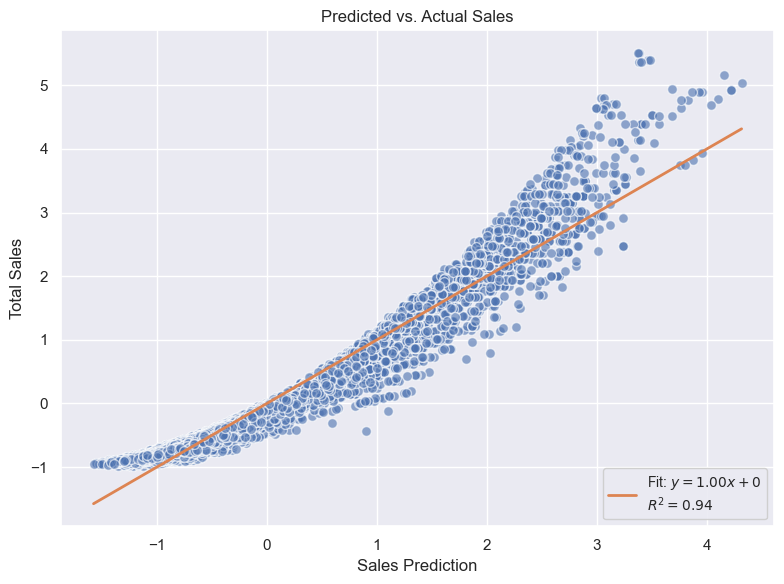

In [76]:
# Pull out x/y
x = df['sales_prediction']
y = df['Total Sales']

# Compute linear fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter points
ax.scatter(
    x, y,
    s=50,
    alpha=0.6,
    edgecolor='w',
    color='#4C72B0'
)

# Regression line
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = intercept + slope * x_fit
ax.plot(
    x_fit, y_fit,
    color='#DD8452',
    linewidth=2,
    label=f'Fit: $y={slope:.2f}x+{intercept:.0f}$\n$R^2={r2:.2f}$'
)

# Labels & title
ax.set_xlabel('Sales Prediction')
ax.set_ylabel('Total Sales')
ax.set_title('Predicted vs. Actual Sales')

# Legend
ax.legend(
    frameon=True,
    fancybox=True,
    framealpha=0.9,
    fontsize='small',
    loc='lower right'
)

plt.tight_layout()
plt.show()

# Conclusion


The results of the data analysed indicated that sales were at their best in July, at their lowest in March, and that the majority of sales occurred during the week. The city of Charleston contributed more than 14% of the total sales, while Birmingham contributed the least, i.e. 8% of the total sales during 2020 and 2021. The busiest shopping days were on weekdays, with in-store sales mode accounting for 40% of total sales. In other words, if advertisements ran during these busy times, sales could rise. As for products sold the most were Men's Street Footwear followed by Women's apparel and Men's atheletic Footwear while women's atheletic footwear is the least selling product.Advertising promotions might benefit from learning which items are most popular in various markets and sales channels. Finding the least popular goods might also be helpful in this regard. Sports Direct, West Gear, and Foot Locker are the top three retailers with the largest market shares. By transferring West Gear's successful business practises to other merchants, it may raise the company's revenue. We were successful in designing a Regression model to make future predictions for Adidas and the validity of our future predictions, our regression model will be able to predict within the spread of 0.105 and has the ability to handle 89.7% of variance in input data. Which can be used to make Sales related prediction which will be extremely helpful for growing and expanding business and taking important business decisions.The sales regression analysis will help to understand how specific aspects in the sales process might impact sales success and anticipate how sales will vary over time whether the same strategy is used or if it must be switched to an alternate method.Sales regression prediction findings may assist businesses in understanding how their sales teams are successful or failing, as well as what the future may look like based on historical sales performance. The data may also be used to forecast future revenues based on improvements that have yet to be implemented, such as whether adding additional salespeople would enhance business revenue.